# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd
import numpy as np
import requests
import time
import csv
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

618

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
counter = 0
term = 0
result = []
print("Beginning Data Retrieval")
print("-----------------------------")
for i in range(len(cities)):
    query_url = url + "appid=" + api_key + "&q=" + cities[i]
    weather_response = requests.get(query_url)
    if weather_response.ok:
        print(f"Processing Record {counter%50} of Set {(term//50)+1} | {cities[i]}")
        counter = counter + 1
        term = term + 1
        result.append(weather_response.json())
    else:
        print("City not found. Skipping...")
        counter = counter
        term = term
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 0 of Set 1 | ushuaia
City not found. Skipping...
Processing Record 1 of Set 1 | hofn
Processing Record 2 of Set 1 | kapaa
Processing Record 3 of Set 1 | laguna
Processing Record 4 of Set 1 | hilo
Processing Record 5 of Set 1 | hasaki
Processing Record 6 of Set 1 | mataura
Processing Record 7 of Set 1 | mar del plata
Processing Record 8 of Set 1 | mahebourg
Processing Record 9 of Set 1 | butaritari
Processing Record 10 of Set 1 | hermanus
Processing Record 11 of Set 1 | palmer
Processing Record 12 of Set 1 | yar-sale
Processing Record 13 of Set 1 | kudahuvadhoo
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | goianesia
Processing Record 16 of Set 1 | bluff
Processing Record 17 of Set 1 | port elizabeth
Processing Record 18 of Set 1 | tsaratanana
Processing Record 19 of Set 1 | lebu
Processing Record 20 of Set 1 | ryazhsk
Processing Record 21 of Set 1 | lima
Processing Record 22 of Set 1 | moo

City not found. Skipping...
Processing Record 34 of Set 4 | hualmay
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record 35 of Set 4 | tommot
Processing Record 36 of Set 4 | maracacume
Processing Record 37 of Set 4 | nikolskoye
Processing Record 38 of Set 4 | artvin
Processing Record 39 of Set 4 | sorong
Processing Record 40 of Set 4 | lorengau
Processing Record 41 of Set 4 | vondrozo
Processing Record 42 of Set 4 | hobyo
Processing Record 43 of Set 4 | iracoubo
Processing Record 44 of Set 4 | port macquarie
Processing Record 45 of Set 4 | pangnirtung
Processing Record 46 of Set 4 | tromso
City not found. Skipping...
Processing Record 47 of Set 4 | cayenne
City not found. Skipping...
City not found. Skipping...
Processing Record 48 of Set 4 | ahipara
City not found. Skipping...
Processing Record 49 of Set 4 | tuatapere
Processing Record 0 of Set 5 | puerto padre
Processing Record 1 of Set 5 | mananjary
Processing Record 2 of Set 5 | tiks

Processing Record 12 of Set 8 | rawson
Processing Record 13 of Set 8 | aquiraz
Processing Record 14 of Set 8 | buerarema
Processing Record 15 of Set 8 | shingu
Processing Record 16 of Set 8 | mangaratiba
Processing Record 17 of Set 8 | kilindoni
Processing Record 18 of Set 8 | bocaiuva
City not found. Skipping...
City not found. Skipping...
Processing Record 19 of Set 8 | myitkyina
Processing Record 20 of Set 8 | bonfim
Processing Record 21 of Set 8 | poum
Processing Record 22 of Set 8 | koslan
Processing Record 23 of Set 8 | xiongyue
Processing Record 24 of Set 8 | punta de bombon
Processing Record 25 of Set 8 | hohhot
Processing Record 26 of Set 8 | karratha
Processing Record 27 of Set 8 | cidreira
Processing Record 28 of Set 8 | dabat
Processing Record 29 of Set 8 | salinas
Processing Record 30 of Set 8 | muros
City not found. Skipping...
Processing Record 31 of Set 8 | cobh
Processing Record 32 of Set 8 | veere
City not found. Skipping...
Processing Record 33 of Set 8 | mitzic
Proc

In [7]:
s1 = json.dumps(result)
d2 = json.loads(s1)
weather_data = open('../files/weather.csv', 'w')

csvwriter = csv.writer(weather_data)
count = 0
for emp in result:
    if count == 0:
        header = emp.keys()
        csvwriter.writerow(header)
        count += 1
    csvwriter.writerow(emp.values())
weather_data.close()

In [8]:
City = []
Cloudiness = []
Country = []
Date = []
Humidity = []
Lat = []
Lng = []
Max_Temp = []
Wind_Speed = []
for item in range(len(result)):
    City.append(result[item]['name'])
    Cloudiness.append(result[item]['clouds']['all'])
    Country.append(result[item]['sys']['country'])
    Date.append(result[item]['dt'])
    Humidity.append(result[item]['main']['humidity'])
    Lat.append(result[item]['coord']['lat'])
    Lng.append(result[item]['coord']['lon'])
    Max_Temp.append(result[item]['main']['temp_max'])
    Wind_Speed.append(result[item]['wind']['speed'])
df = pd.DataFrame(list(zip(City, Cloudiness, Country, Date, Humidity, Lat, Lng, Max_Temp, Wind_Speed)), 
               columns =['City', 'Cloudiness', 'Country', 'Date', 'Humidity', 'Lat', 'Lng', 'Max_Temp', 'Wind_Speed']) 
df.count()

City          548
Cloudiness    548
Country       548
Date          548
Humidity      548
Lat           548
Lng           548
Max_Temp      548
Wind_Speed    548
dtype: int64

In [9]:
df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_Temp,Wind_Speed
0,Ushuaia,75,AR,1573025207,86,-54.81,-68.31,274.15,3.60
1,Hofn,100,IS,1573025207,91,64.25,-15.21,273.79,6.70
2,Kapaa,1,US,1573025208,88,22.08,-159.32,298.15,2.60
3,Laguna,40,BZ,1573025208,94,16.17,-88.94,296.15,0.94
4,Hilo,1,US,1573025208,78,19.71,-155.08,298.15,2.10


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [84]:
#df2 = df.copy()
#df2['Date'] = pd.to_datetime(df['Date'])
#df2.head()
#datetime.fromtimestamp(df['Date']).strftime('%Y-%m-%d')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

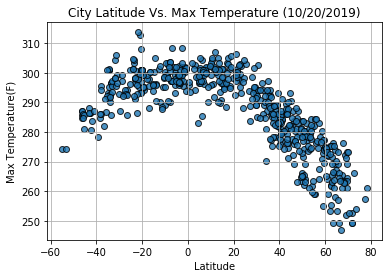

In [10]:
plt.scatter(x=df['Lat'], y=df['Max_Temp'], alpha=0.8, edgecolors ="black")
plt.grid()
plt.title("City Latitude Vs. Max Temperature (10/20/2019)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")
plt.savefig("../Images/LatVsMaxTep.png")
plt.show()

#### Latitude vs. Humidity Plot

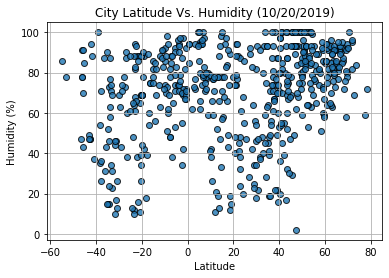

In [11]:
plt.scatter(x=df['Lat'], y=df['Humidity'], alpha=0.8, edgecolors ="black")
plt.grid()
plt.title("City Latitude Vs. Humidity (10/20/2019)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("../Images/LatVsHum.png")
plt.show()

#### Latitude vs. Cloudiness Plot

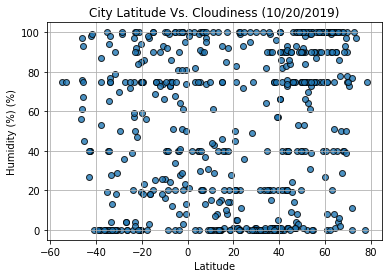

In [12]:
plt.scatter(x=df['Lat'], y=df['Cloudiness'], alpha=0.8, edgecolors ="black")
plt.grid()
plt.title("City Latitude Vs. Cloudiness (10/20/2019)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%) (%)")
plt.savefig("../Images/LatVsCloud.png")
plt.show()

#### Latitude vs. Wind Speed Plot

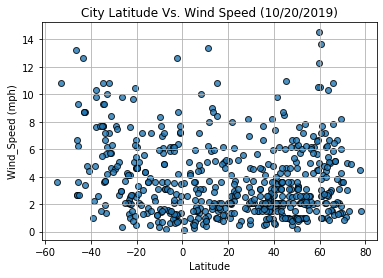

In [13]:
plt.scatter(x=df['Lat'], y=df['Wind_Speed'], alpha=0.8, edgecolors ="black")
plt.grid()
plt.title("City Latitude Vs. Wind Speed (10/20/2019)")
plt.xlabel("Latitude")
plt.ylabel("Wind_Speed (mph)")
plt.savefig("../Images/LatVsWind.png")
plt.show()